<h1 align=center> Medical Insurance Premium Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
le = LabelEncoder()

In [5]:
df = data.copy()

In [6]:
df['sex'] = le.fit_transform(df['sex'])

In [7]:
df['smoker'] = le.fit_transform(df['smoker'])

In [8]:
df['region'] = le.fit_transform(df['region'])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(1337, 7)

In [15]:
df.size

9359

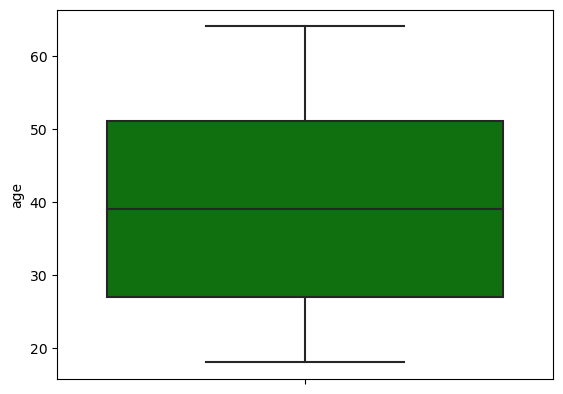

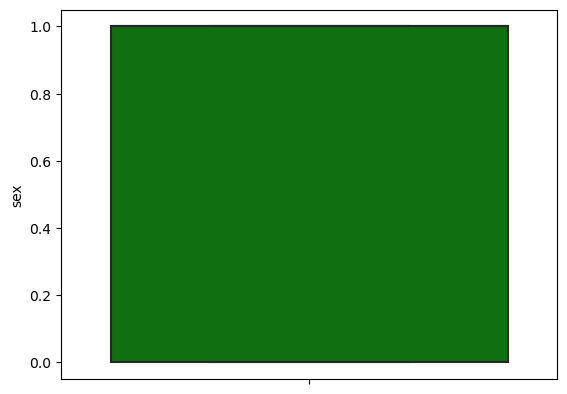

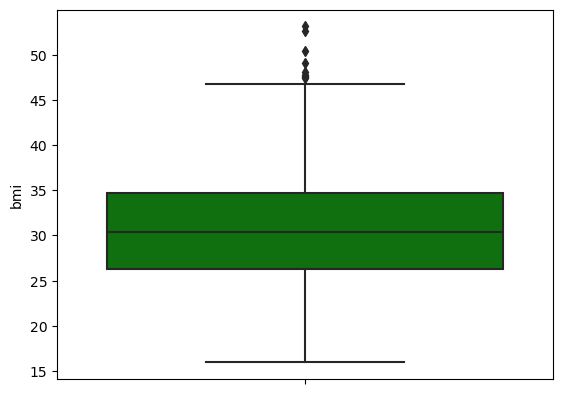

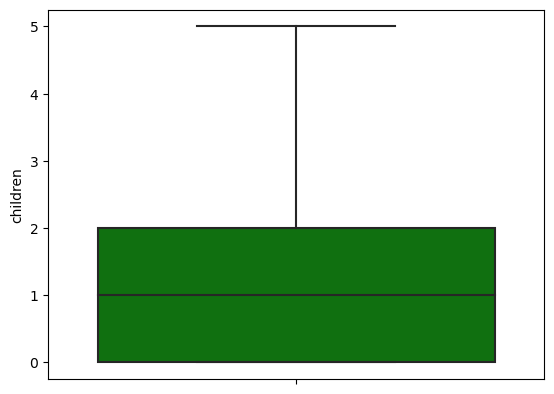

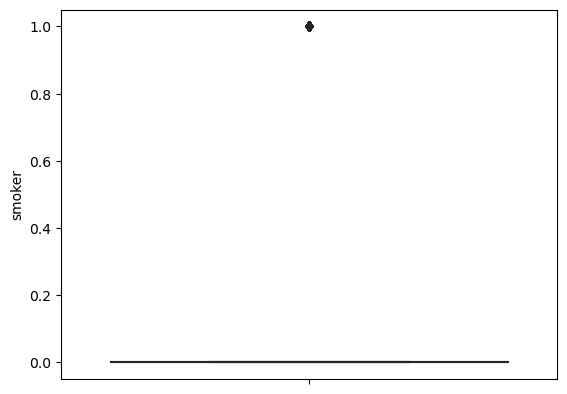

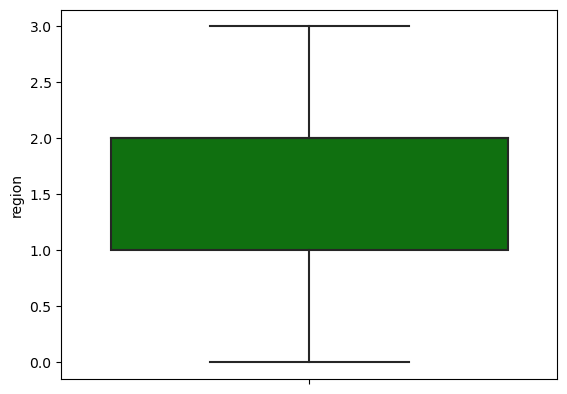

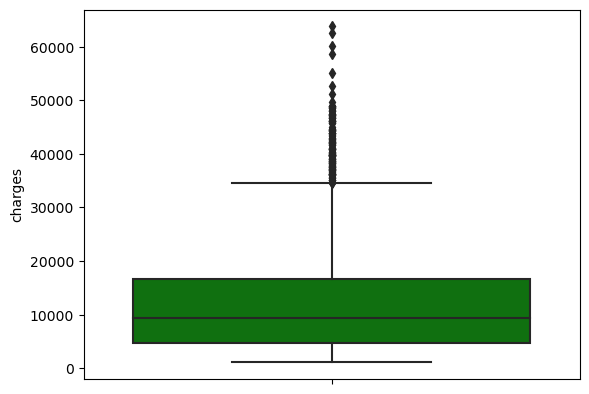

In [16]:
# Boxplot
for i in df.columns:
    sns.boxplot(y=df[i],color='green')
    plt.show()

#### Outlier treatment- IQR method

In [29]:
def outlierlimit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [30]:
for i in df.columns:
    UL,LL = outlierlimit(df[i])
    df[i] = np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

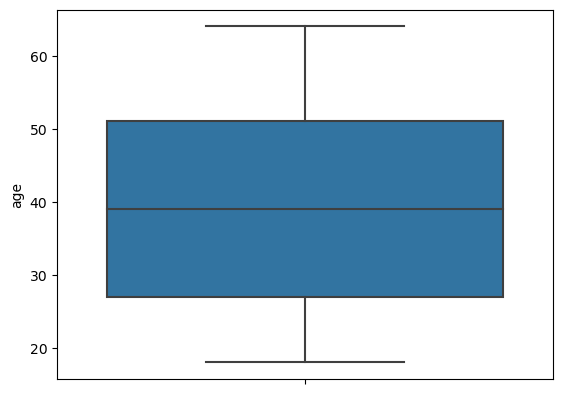

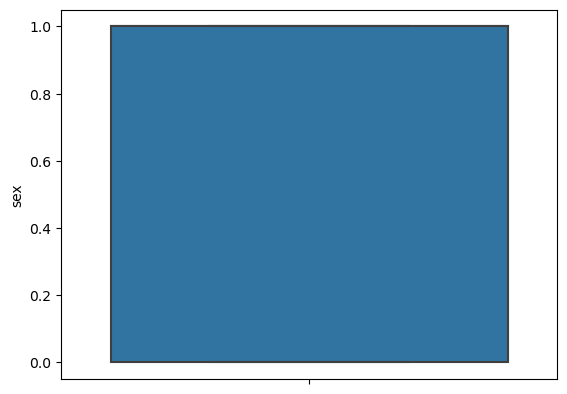

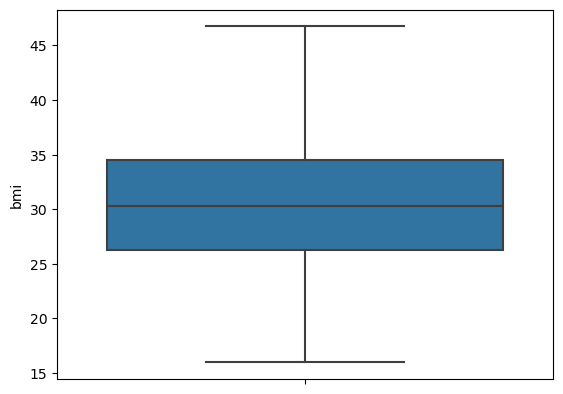

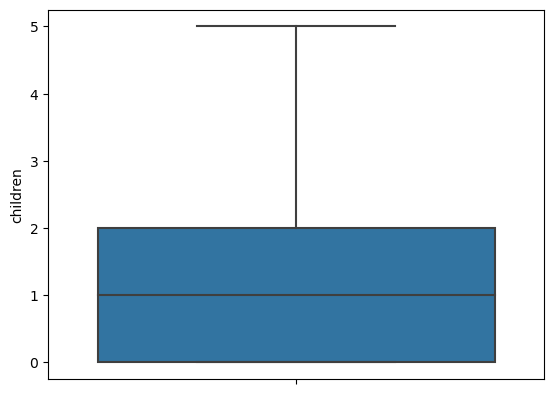

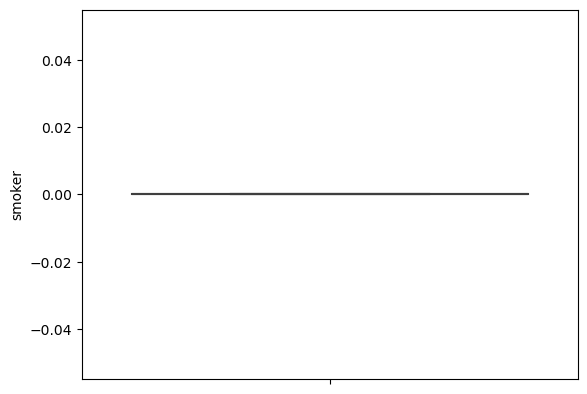

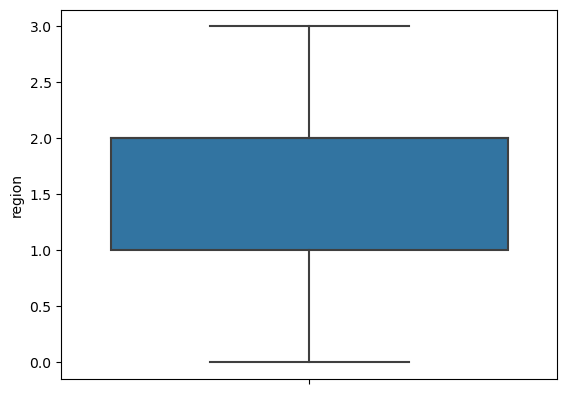

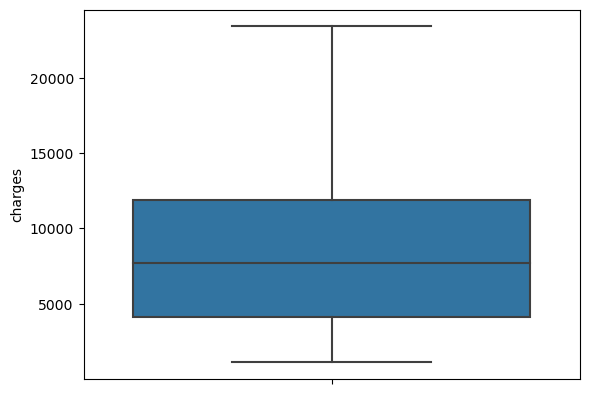

In [31]:
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.show()

In [32]:
df.dropna(inplace=True)

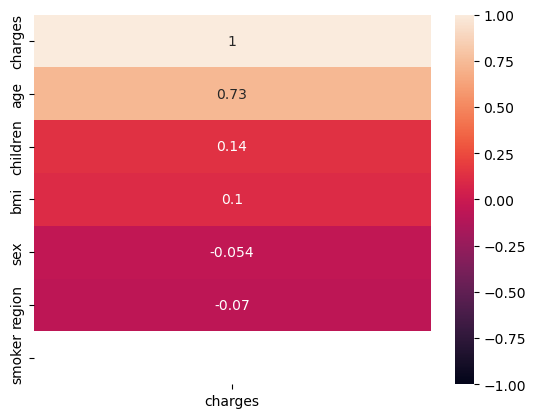

In [33]:
sns.heatmap(df.corr()[['charges']].sort_values(by='charges',ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

In [34]:
x = df.iloc[:,:-1].values

In [35]:
y = df.iloc[:,-1].values

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=78,shuffle=True)

In [37]:
models = {"LinearRegression":LinearRegression(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [38]:
for name,model in models.items():
    model.fit(x_train,y_train)
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    y_pred = model.predict(x_test)
    score = r2_score(y_test,y_pred)
    print("r2 score",score)
    print("Avg rmse",rmse_avg)
    print('*'*100)

Cross validation model:LinearRegression
r2 score 0.5398630157606019
Avg rmse 2953.5408072012474
****************************************************************************************************
Cross validation model:Ridge
r2 score 0.5398449597218562
Avg rmse 2953.5425730129878
****************************************************************************************************
Cross validation model:Lasso
r2 score 0.5398857039861007
Avg rmse 2953.5752948489894
****************************************************************************************************
Cross validation model:RandomForestRegressor
r2 score 0.4120166484016571
Avg rmse 3212.757419924636
****************************************************************************************************
Cross validation model:AdaBoostRegressor
r2 score 0.21263645929927555
Avg rmse 3870.2909728025907
****************************************************************************************************
Cross validation model:Gradient

In [39]:
Model = Ridge()

In [40]:
R_model = Model.fit(x_train,y_train)

In [41]:
y_pred = R_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Score {}".format(score))

Score 0.5398449597218562


In [42]:
R_model.score(x_train,y_train)

0.524403028333835

In [43]:
R_model.score(x_test,y_test)

0.5398449597218562

In [44]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=["Actual","Prediction"])
Output.head()

,Actual,Prediction
0,4686.38870,5793.022167
1,13822.80300,13189.758203
2,12475.35130,11826.075305
3,3594.17085,4635.549203
4,8798.59300,10103.828112


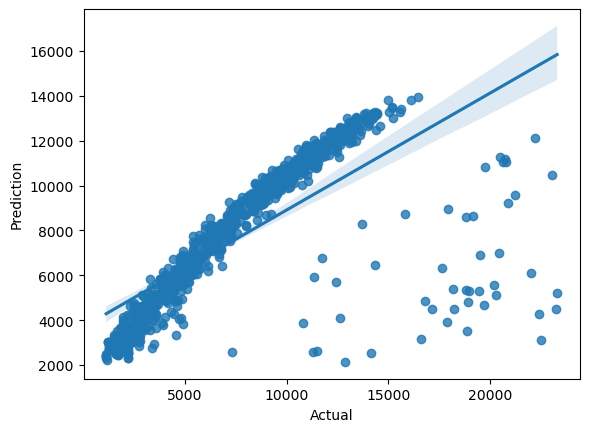

In [45]:
sns.regplot(data=Output,x="Actual",y="Prediction")
plt.show()